# Data Intelligence Exam

Jonas Skjødt | skjo@itu.dk | Date: 2025-26-05  

## Introduction

This report analyzes the census-1994.csv dataset. As per the description of the dataset: "Census data from USA gathered in 1994. Contains demographic information about US citizens. These values are self-reported by the participating citizens."

The report goes through the technologies used to understand the data, followed by sections which explore the data set to see what it holds. The report then adds questions to test the data set with, followed by preprocessing its data. Once preprocessed, the data set is then examined by looking at data relationships, analyzed through these data relationships, and then followed by a conclusion.

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We import the libraries we need to extract data from the csv. We use the Pandas library for data manipulation, and Seaborn and MapPlotLib for visual presentation.

# Exploration
In the exploration phase, we'll superficially look through the data set. We'll be using data manipulation such as df.columns.tolist() to look at the column names, df.head() to see the five first values of each column, value_counts() which returns the count of unique values in a column, and df.describe() to summarize the central tendencies of a column.

As a start, let's make sure the columns match the handed out description of what the data set entails.

In [192]:
df = pd.read_csv('census-1994.csv')
df.columns.tolist()

['age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

The correct columns are all there, let's continue the exploration.

In [193]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
educationColumn = df['education'].value_counts()
print(educationColumn)

workclassColumn = df['workclass'].value_counts()
print('\n', workclassColumn)

education
HS-grad         10199
Some-college     7044
Bachelors        5160
Masters          1669
Assoc-voc        1347
11th             1124
?                1043
Assoc-acdm       1031
10th              914
7th-8th           625
Prof-school       560
9th               498
12th              415
Doctorate         404
5th-6th           320
1st-4th           158
Preschool          50
Name: count, dtype: int64

 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [195]:
count1 = df['capital_gain'].describe()
print(count1)

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64


There seems to be some values marked as " ?" in different columns. This is outlined in, for instance, columns like " education" and " workclass" with a " ?" value. We'll take care of the missing values in the preproccessing later. Let's take a quick look by visualizing the capital_gain column. We'll use Seaborn here to visualize the distribution through a histplot.

Text(0.5, 1.0, 'Non Zero Capital Gains')

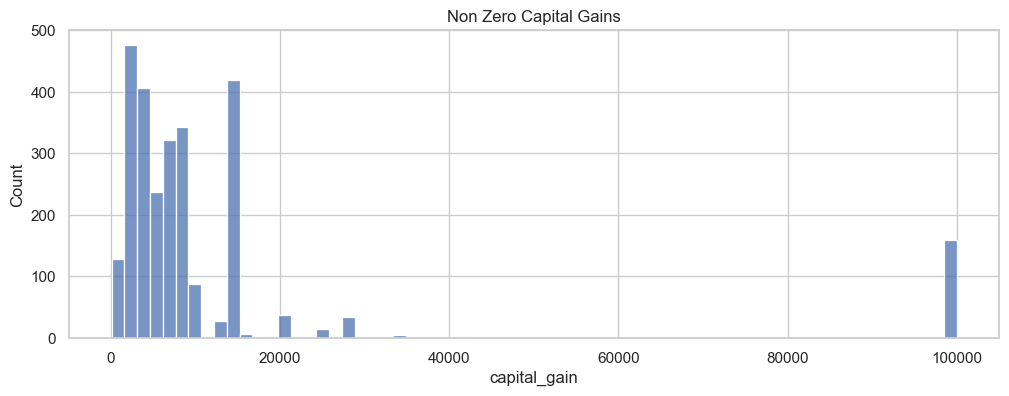

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['capital_gain'] > 0] ['capital_gain'])
plt.title('Non Zero Capital Gains')

In the data, 99999 shows as the max value - which could indicate that thats the capped max value. There is also the possibility that the legacy systems of 1994 had fixed numeric inputs. However, for this assignment, let's assume it was capped for a reason, perhaps as a display for anonymonity for the very wealthy. Let's make a test to see how many it has.

In [197]:
print(f"Amount of 99999: {(df['capital_gain'] == 99999).sum()}")

Amount of 99999: 159


There are 159 values at the number 99999, it has less of a chance to be a regular outlier then.

Let's explore further, do we see the same trends in the column capital_loss?

In [198]:
print(df['capital_loss'].describe())

# Check if 99999 is with what we expect
top = df[df['capital_gain'] == 99999]
print(f"Percentage top: {len(top)/len(df):.2%}")

# Compare
print(f"Capital loss max: {df['capital_loss'].max()}")

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64
Percentage top: 0.49%
Capital loss max: 4356


Although it could look like an outlier, there is a change that bias could be introduced to the dataset if the value is removed. The existence of wealthy high earners seems to be represented by the capped 99999 number.

Otherwise there doesnt seem to be any suspicious numbers in the capital_loss column, as its max is set at 4356.

The rest of the data set seems straight forward with nothing unusual, indicating the status of education, occupation, age, income_bracket, etc.. TODO MORE

# Research questions and hypothesis
On the basis of the data exploration, these are the research questions this report will continue with.

How do the highest capital earners corrolate with executive occupations or trading (asset sales)?

Is there a systemic bias based around race or gender, showing an imbalance in income?

### Preprocessing
We'll start by cleaning up the dataset to examine the data further. We'll try going by Hadley Wicham's tidy data principles (ref. 1). Right now, the data set is already tidy in structure and only a small clean up is needed. We standardize by stripping whitespace from objects to and clarify values.

In [ ]:
# define the columns which has the missing values
cols_with_missing = ['education', 'workclass', 'occupation', 'gender', 'native_country']
# replace '?' with 'unknown'
df[cols_with_missing] = df[cols_with_missing].replace(' ?', 'unknown')

# verify if the replacement worked
print(df.isin([' ?']).sum())

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64


" ?" is replaced with "unknown" to indicate a better wording for the value. The reason why the values were inserted by users as a question mark was most likely because they didn't answer it or the values didn't match the user's experiences. In either case, let's keep these values as unknowns to not lose any data.

In [200]:
# Clean string-type columns (including 'object' and 'category')
str_cols = df.select_dtypes(include=['object', 'category']).columns

# strip whitespace and replace ' ?' with 'unknown' if there were any
df[str_cols] = df[str_cols].apply(
    lambda x: x.str.strip() if x.dtype == 'object' else x.replace(' ?', 'unknown').str.strip()
)

# Verify cleaning
for col in str_cols:
    weird_spaces = df[col].astype(str).str.contains(r'^\s|\s$').sum()
    print(f"{col}: {weird_spaces} leading/trailing spaces (should be 0)")

workclass: 0 leading/trailing spaces (should be 0)
education: 0 leading/trailing spaces (should be 0)
marital_status: 0 leading/trailing spaces (should be 0)
occupation: 0 leading/trailing spaces (should be 0)
relationship: 0 leading/trailing spaces (should be 0)
race: 0 leading/trailing spaces (should be 0)
gender: 0 leading/trailing spaces (should be 0)
native_country: 0 leading/trailing spaces (should be 0)
income_bracket: 0 leading/trailing spaces (should be 0)


All the columns had a trailing space. We stripped each object of its whitespace and made sure again to replace the question mark with "unknown".

Afterwards, we make a for loop to go through the columns to look for any missed whitespaces we haven't taken care of. The print shows us all whitespaces are taken care of.

In [201]:
df = df[df['gender'] != 'unknown']

Finally, in the gender column, let's only focus on two genders. This will make things a bit easier for us as we analyze the data relationships.

### Examination of data

In this section, we'll look at the relationships between different variables in the data. We'll begin by looking at the relationships to the first question: How do the highest capital earners corrolate with executive occupations or trading (asset sales)?

To understand the relationships, we'll use data manipulation from the Pandas library. Functions like groupby() where we can group different columns together to analyze the data within each group, unstack(), crosstab(), use percentage calculations (since there are a larger amount from the race "white" who's represented in the dataset), and use value_counts() to count unique values (ref. 2).

In [202]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# group by occupation and count
occupation_counts = high_gainers['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']
# sort by count
best_occupation = occupation_counts.sort_values(by='count', ascending=False).head(10)

print(best_occupation)

          occupation  count
0     Prof-specialty     63
1    Exec-managerial     42
2              Sales     23
3       Craft-repair      8
4       Adm-clerical      6
5            unknown      4
6      Other-service      2
7  Machine-op-inspct      1
8    Protective-serv      1
9  Handlers-cleaners      1


The highest earning individuals are already mostly in high paying jobs. Prof-speciality (specialised in the likes of medicin, law, etc.) are the highest asset earners. Those who do sales as their occupation are lower than the ones that Exec-managerial and Prof-specialty, but still in the top three.

In [203]:
# by workclass
high_gainers = df[df['capital_gain'] > 50000]
print(high_gainers['workclass'].value_counts())

#by age
print('\n', high_gainers.groupby('occupation')['age'].median())

workclass
Private             78
Self-emp-inc        34
Self-emp-not-inc    28
Local-gov            6
unknown              4
Federal-gov          1
State-gov            1
Name: count, dtype: int64

 occupation
Adm-clerical         44.0
Craft-repair         52.5
Exec-managerial      48.0
Handlers-cleaners    42.0
Machine-op-inspct    33.0
Other-service        45.5
Prof-specialty       45.0
Protective-serv      21.0
Sales                43.0
Tech-support         48.0
unknown              59.5
Name: age, dtype: float64


Looking at the workclass data of the high assert earners, it further shows how Private is dominating, and self employed is following closely. "Private" suggesting well earning jobs at corporations. Concerning their age, its evident the majority of highest earners are in their fourties or above in age.

In [204]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# top by education
edu_occuption = high_gainers.groupby(['occupation', 'education']).size().unstack()

print(edu_occuption.loc[['Prof-specialty', 'Exec-managerial', 'Sales']])

education        10th  9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
occupation                                                                
Prof-specialty    NaN  NaN         1.0        1.0        8.0        7.0   
Exec-managerial   NaN  NaN         NaN        NaN       14.0        3.0   
Sales             NaN  NaN         NaN        NaN       11.0        1.0   

education        HS-grad  Masters  Prof-school  Some-college  unknown  
occupation                                                             
Prof-specialty       2.0      5.0         38.0           NaN      1.0  
Exec-managerial      6.0     10.0          5.0           3.0      1.0  
Sales                4.0      2.0          NaN           5.0      NaN  


As the data shows, the people with high asset income have varying degrees at the higher end of education. The Prof-specialty all have advanced degrees (most have the education level of Prof-school, indicating lawyers, doctors, etc..), while this educational level becomes a balanced mix as we go to Exec-managerial and sales positions.

In [205]:
# using income_bracket to make sure we are looking at actual high earners
cross_tab = pd.crosstab(high_gainers['income_bracket'], high_gainers['occupation'])
print(cross_tab)

occupation      Adm-clerical  Craft-repair  Exec-managerial  \
income_bracket                                                
>50K                       6             8               42   

occupation      Handlers-cleaners  Machine-op-inspct  Other-service  \
income_bracket                                                        
>50K                            1                  1              2   

occupation      Prof-specialty  Protective-serv  Sales  Tech-support  unknown  
income_bracket                                                                 
>50K                        63                1     23             1        4  


As a small check, we make a crosstab to ensure the high asset earners are also people who earn over 50k dollars a year. The values show they are indeed similar.

We'll now focus on the next question, "Is there a systemic bias based around race or gender, showing an imbalance in income? - For instance, do women have less income than men with equivalent gains?" We'll start by taking a look at the income levels of both gender and race.

In [206]:
# gender
gender_income = df.groupby(['gender', 'income_bracket']).size().unstack()
gender_income_pct = gender_income.div(gender_income.sum(axis=1), axis=0) * 100
print("Income by Gender (%):")
print(gender_income_pct.round(1))

# race
race_income = df.groupby(['race', 'income_bracket']).size().unstack()
race_income_pct = race_income.div(race_income.sum(axis=1), axis=0) * 100
print("\nIncome by Race (%):")
print(race_income_pct.round(1))

Income by Gender (%):
income_bracket  <=50K  >50K
gender                     
Female           89.1  10.9
Male             69.2  30.8

Income by Race (%):
income_bracket      <=50K  >50K
race                           
Amer-Indian-Eskimo   88.2  11.8
Asian-Pac-Islander   72.9  27.1
Black                87.5  12.5
Other                90.7   9.3
White                74.3  25.7


The data shows how males are almost three times more likely to earn > 50k a year than females, showing how females earn 10.9% and males 30.8% above 50 k.

Notice also the races "white" and "asian" are earning almost trible the amount above 50k, compared to that of "black" and "Amer-Indian-Eskimo".

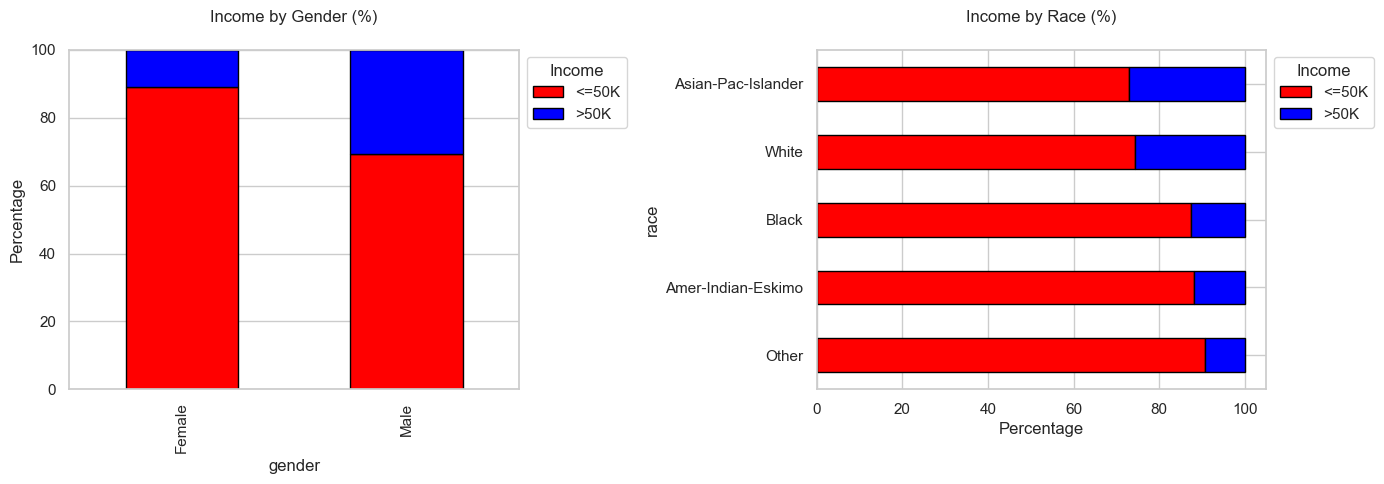

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gender (percentage)
gender_income_pct.plot(kind='bar', stacked=True, ax=ax1, 
                      color=['red','blue'], edgecolor='black')
ax1.set_title('Income by Gender (%)', pad=20)
ax1.set_ylabel('Percentage')
ax1.set_ylim(0, 100)
ax1.legend(title='Income', bbox_to_anchor=(1, 1))

# Race (percentage)
race_income_pct.sort_values('>50K').plot(kind='barh', stacked=True, ax=ax2, 
                                        color=['red','blue'], edgecolor='black')
ax2.set_title('Income by Race (%)', pad=20)
ax2.set_xlabel('Percentage')
ax2.legend(title='Income', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Visualizing the data makes it a bit more clear. It shows how women generally earn less than men. Furthermore, the data also shows the gap between races, as white/asians generally earn more than Amer-Indian-Eskimo, black and others.

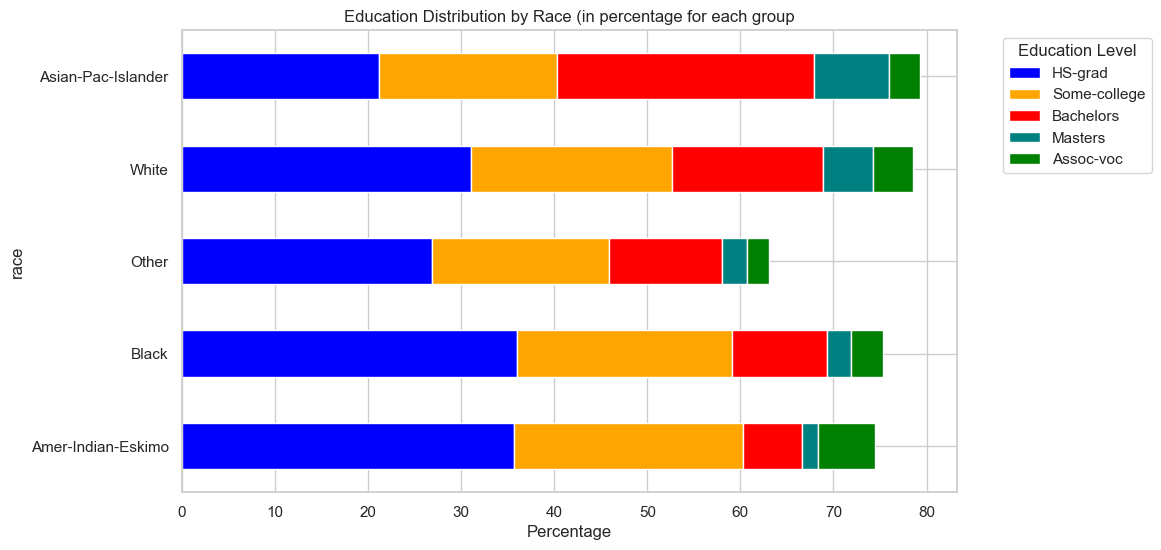

In [208]:
education_by_race = df.groupby(['race', 'education']).size().unstack()

# Calculate percentages within each race
education_pct = education_by_race.div(education_by_race.sum(axis=1), axis=0) * 100

# Plot top 5 education levels for clarity
top_educations = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc']
education_pct[top_educations].sort_values('Bachelors', ascending=True).plot(
    kind='barh', 
    stacked=True,
    figsize=(10, 6),
    color=['blue', 'orange', 'red', 'teal', 'green']
)

plt.title('Education Distribution by Race (in percentage for each group')
plt.xlabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
plt.show()

Looking at the relationship between education and race, we find "Black", "Amer-India-Eskimo" and "Other" to have low education, where "White" and "Asian" tend to go for higher education. The cultivation of education and the skill it brings with it gives a higher chance of high paying jobs.

In [209]:
hours_by_race = df.groupby('race')['hours_per_week'].mean().sort_values(ascending=False)
print(hours_by_race)

race
White                 40.680547
Amer-Indian-Eskimo    40.151515
Asian-Pac-Islander    40.134010
Other                 39.326848
Black                 38.388908
Name: hours_per_week, dtype: float64


The dataset details that the race, "White", works more than other races - perhaps indicating being "White" has more work oppeturnities.

In [210]:
hours_race_income = df.groupby(['race', 'income_bracket'])['hours_per_week'].mean().unstack()
print(hours_race_income.sort_values('<=50K', ascending=False).round(1))

income_bracket      <=50K  >50K
race                           
Amer-Indian-Eskimo   39.5  45.1
White                39.0  45.6
Other                38.7  45.1
Asian-Pac-Islander   38.4  44.8
Black                37.6  44.2


The data indicates that the race "Black" works less than "White" or "Amer-Indian-Eskimo" when earning below 50k. Further strengthening the idea that the race "black" may have less work oppertunities.

In [211]:
# gender occupation
occupation_gender = df.groupby(['gender', 'occupation']).size().unstack()
print(occupation_gender[['Exec-managerial', 'Prof-specialty', 'Sales']], "\n")

# gender hours of work
gender_hours = df.groupby(['gender', 'income_bracket'])['hours_per_week'].mean().unstack()
print(gender_hours)

occupation  Exec-managerial  Prof-specialty   Sales
gender                                             
Female               1108.0          1455.0  1187.0
Male                 2773.0          2496.0  2281.0 

income_bracket      <=50K       >50K
gender                              
Female          35.913804  40.466964
Male            40.667340  46.334428


For gender, the difference is also shown between men and women. Men usually hold higher paying occupations and higher paying jobs than women. As seen by the dataset, men outnumber women almost 2 to 1 in the highest paying jobs. But as seen by the income bracket vs hour_per_week spent working, men work almost 6 hours more than women on average .

# Analysis
In this section, we'll look at the relationships by analyzing them more in depth.

### Examination of the Questions

In the start of the 90s in U.S., high earning capital gain is dominated by Prof-school and other high end educations. These were typically lawyers, doctors, professors, or other highly educated societal members. These individuals usually have insights, either from education or social circles, and enough money to invest. This tendency is also shown in the number of individuals working with sales who invest and lead to greater asset earning returns.


C:\Users\jonas\AppData\Local\Temp\ipykernel_26180\1346891089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=high_gainers, y='occupation',


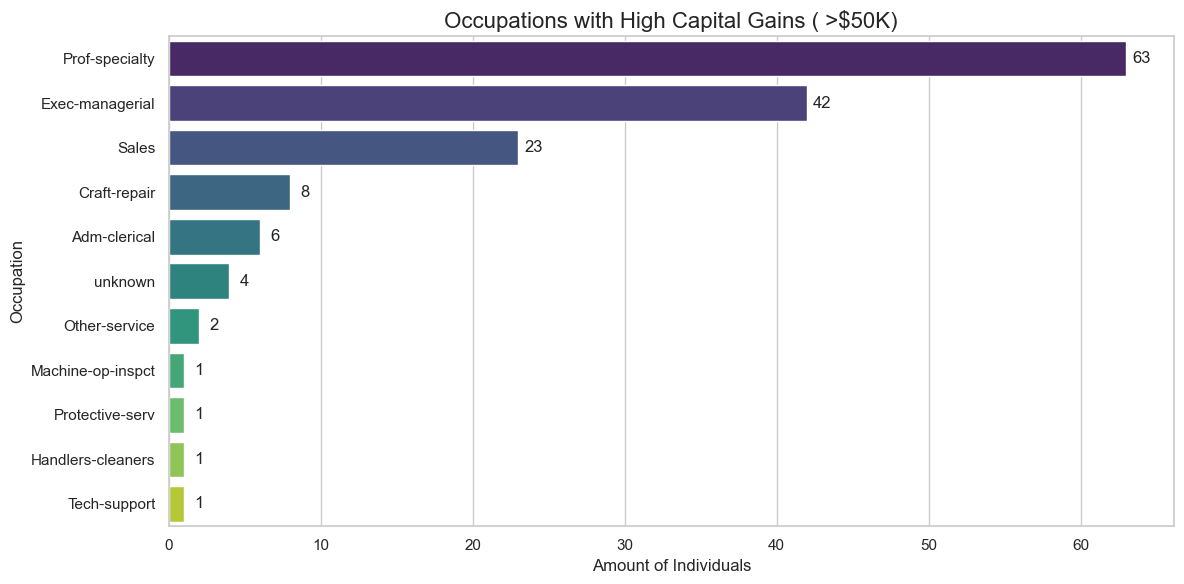

In [212]:
# Filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# Create countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=high_gainers, y='occupation', 
                   order=high_gainers['occupation'].value_counts().index,
                   palette='viridis')

# Add annotations
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height()/2, 
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Plot
plt.title('Occupations with High Capital Gains ( >$50K)', fontsize=16)
plt.xlabel('Amount of Individuals', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout() # using tight layout to avoid overlap
plt.show()

As the visualization shows, there is a clear concensus that high earning occupations usually leads to greater asset earning income as well. This could either be due to stock investments, real estate, or business returns.

For the second question, which looked at whether there is a systemic bias based on race or gender, the data examination showed how the races "White" and "Asian" earned more than "Black", "Amer-Indian-Eskimo", and other races. It also showed how the gap in education between the races is big, in turn leading to less developed skills for the uneducated. The examination also showed how there is an imbalance between the genders, where men generally earned more. This seems to prove statistically that there is a "double disadvantage" of being a black woman in 1994, USA. 

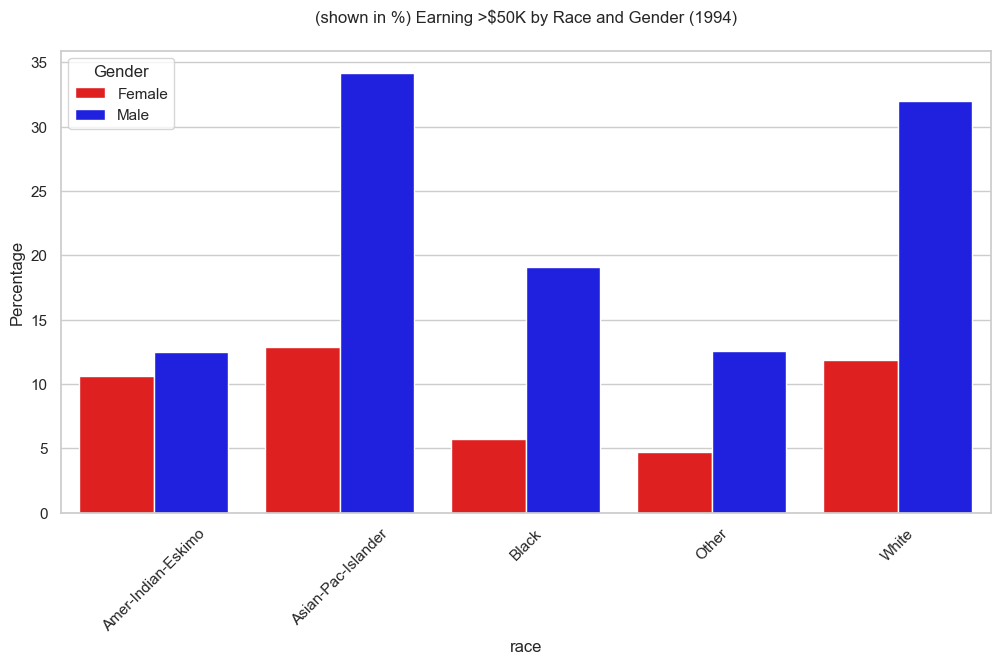

In [214]:
# Filter for high earners and group by race + gender
high_earners = df[df['income_bracket'] == '>50K']
gender_race_counts = high_earners.groupby(['race', 'gender']).size().unstack()

# Convert counts to percentages
gender_race_pct = gender_race_counts.div(df.groupby(['race', 'gender']).size().unstack()) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_race_pct.reset_index().melt(id_vars='race'), 
    x='race', 
    y='value', 
    hue='gender',
    palette={'Male': 'blue', 'Female': 'red'}
)
plt.title('(shown in %) Earning >$50K by Race and Gender (1994)', pad=20)
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Using Seaborn, we're able to visualize the "female" gender is earning a lot less income compared to "male" in all races. We define those who earn over 50k from the income_bracket, and group the genders and race together in a groupby, convert it to percentages (because the race "white" is over-representated in the dataset), and then make a barplot to showcase it.

In particular, the plot shows that if you are a black woman, you have a high change of having a low income(along with "other"), more so than any other races. The barplot visualizes the 1994 U.S. inequality problems fairly well, as not only are genders low on the social income ladder, but so too are races.

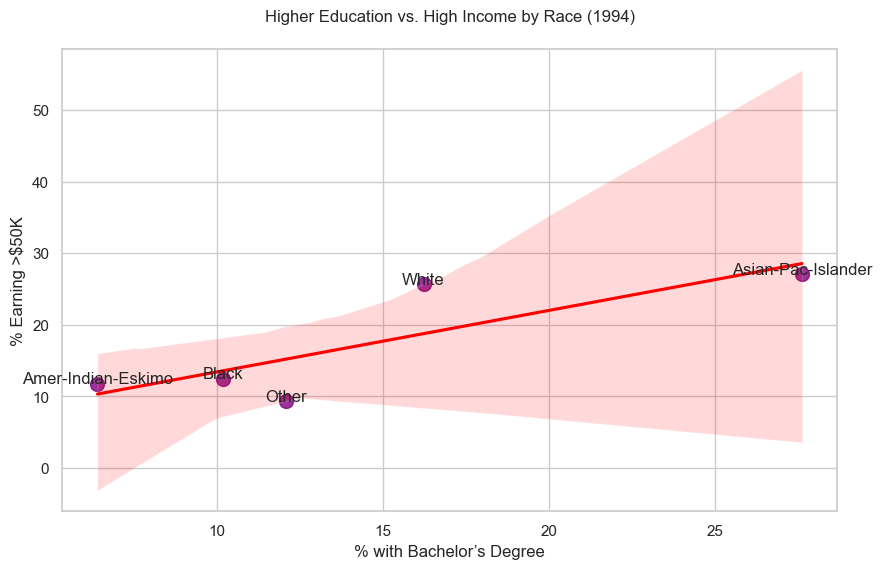

In [ ]:
# Calculate % with Bachelor's degree per race
education_race = df.groupby('race')['education'].apply(lambda x: (x == 'Bachelors').mean() * 100)

# Use merge to merge income data with bachelor's degree percentages from education
race_stats = pd.merge(
    education_race.rename('pct_bachelors'),
    # rename the '>50K' column to 'pct_high_income' so it is clear what it represents
    race_income_pct['>50K'].rename('pct_high_income'),
    left_index=True,
    right_index=True
)

# Plot with regression line
# the regression line helps visualize the relationship between education and income
# since
plt.figure(figsize=(10, 6))
sns.regplot(
    data=race_stats, 
    x='pct_bachelors', 
    y='pct_high_income',
    scatter_kws={'s': 100, 'color': 'purple'},
    line_kws={'color': 'red'}
)
for race in race_stats.index:
    plt.text(race_stats.loc[race, 'pct_bachelors'], race_stats.loc[race, 'pct_high_income'], race, ha='center')
plt.title('Higher Education vs. High Income by Race (1994)', pad=20)
plt.xlabel('% with Bachelor’s Degree')
plt.ylabel('% Earning >$50K')
plt.show()

The plot's x-axis shows the % of races with a Bachelor's degree and the y-axis the % of races earning > $50k. The regression shows the general trend between these two axises with an upwards trend. The pink area around it is the range of this relationship and where it might land. It shows higher education is usually indicative of higher earnings. Yet again, we notice how there is distance of between the races in their income and education level. The inequality shown in the graph could highlight systemic bias (discrimination or inequal oppertunities) which limit economic decisions.

In [216]:
print(race_stats.loc[['Black', 'White']])

       pct_bachelors  pct_high_income
race                                 
Black      10.184874        12.470588
White      16.218053        25.731436


Furthermore, the plot also shows that having a bachelor's degree does not necessarily give the same income. 10% of black individuals have Bachelor's degrees compared to 16% white individuals. Only 12.5% black individuals earn above 50k compared to 25.7% white individuals who earn above 50k.

# Conclusion
To fully understand the data set, we have to understand the social, political and historical context of USA in 1994 and before it. Although being established as a melting pot of different nationalities, in the start 90s the states has had a long dark past of racial divide. Being black in America has roots in slavery, and being white benefited from this discrimination. Building on that foundation over time, it has historically shown a tendency where this discrimination has induced unfair poverty, and less choices from that heritage. Being colored could face discimination not only in every day life, but also in the hiring process of a job.
When examining the dataset, these imbalances becomes evident as, generally, lower income, lower education, and less income jobs are held in greater numbers by those of colored heritage. In turn, a lower educational level means lower amount of skill which is needed with higher paying jobs.

Likewise, historically and socially, women have usually been the ones caretaking for their children while the man of the house went to work. Although this trend seems to live on in 1994 America, contextually women were more prone to be stay at home moms (ref. 3). Looking at the genders in the dataset, the data shows how men hold higher paying occupations and higher paying jobs than women. Factors like these show the underlying pull of society and its complexities.



# References

(1): Hadley Wicham's tidy principles example https://github.com/hadley/tidy-data/blob/master/data/tb.r

(2): Pandas docs https://pandas.pydata.org/docs/

(3): More stay at home moms in 1994. https://eu.goupstate.com/story/news/2003/06/17/90s-brought-boom-in-stay-at-home-moms/29672470007/